**LEVEL 2**

Import libraries

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

Load dataset

In [8]:
df = pd.read_csv('/content/Dataset 1.csv')
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


**TASK 1 : Restaurant Ratings**

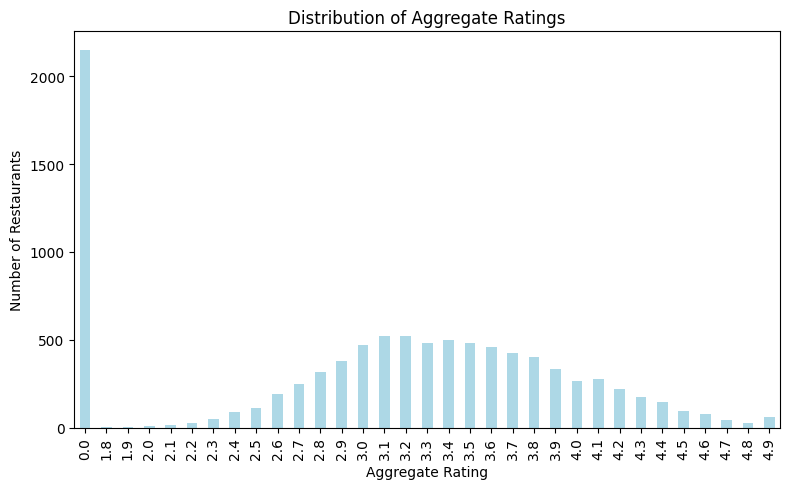

Most Common Aggregate Rating: 0.0
Average Number of Votes: 156.91


In [9]:
# Drop missing ratings if any
df = df.dropna(subset=['Aggregate rating', 'Votes'])

# Plot Distribution of Ratings
plt.figure(figsize=(8,5))
df['Aggregate rating'].value_counts().sort_index().plot(kind='bar', color='lightblue')
plt.title('Distribution of Aggregate Ratings')
plt.xlabel('Aggregate Rating')
plt.ylabel('Number of Restaurants')
plt.tight_layout()
plt.show()

# Most Common Rating
most_common_rating = df['Aggregate rating'].mode()[0]
print(f"Most Common Aggregate Rating: {most_common_rating}")

# Average Number of Votes
average_votes = df['Votes'].mean()
print(f"Average Number of Votes: {average_votes:.2f}")


**TASK 2: Cuisine Combination**

In [10]:
# Drop rows with missing 'Cuisines' or 'Aggregate rating'
df = df.dropna(subset=['Cuisines', 'Aggregate rating'])

# Count most common cuisine combinations
common_combinations = df['Cuisines'].value_counts().head(5)
print("Top 5 Most Common Cuisine Combinations:")
print(common_combinations)

# Check average rating of these common combinations
print("\nAverage Ratings of Top Cuisine Combinations:")
for cuisine in common_combinations.index:
    avg_rating = df[df['Cuisines'] == cuisine]['Aggregate rating'].mean()
    print(f"{cuisine} : {avg_rating:.2f}")


Top 5 Most Common Cuisine Combinations:
Cuisines
North Indian             936
North Indian, Chinese    511
Chinese                  354
Fast Food                354
North Indian, Mughlai    334
Name: count, dtype: int64

Average Ratings of Top Cuisine Combinations:
North Indian : 1.67
North Indian, Chinese : 2.42
Chinese : 2.04
Fast Food : 2.12
North Indian, Mughlai : 2.89


**TASK 3: Geographic Analysis**

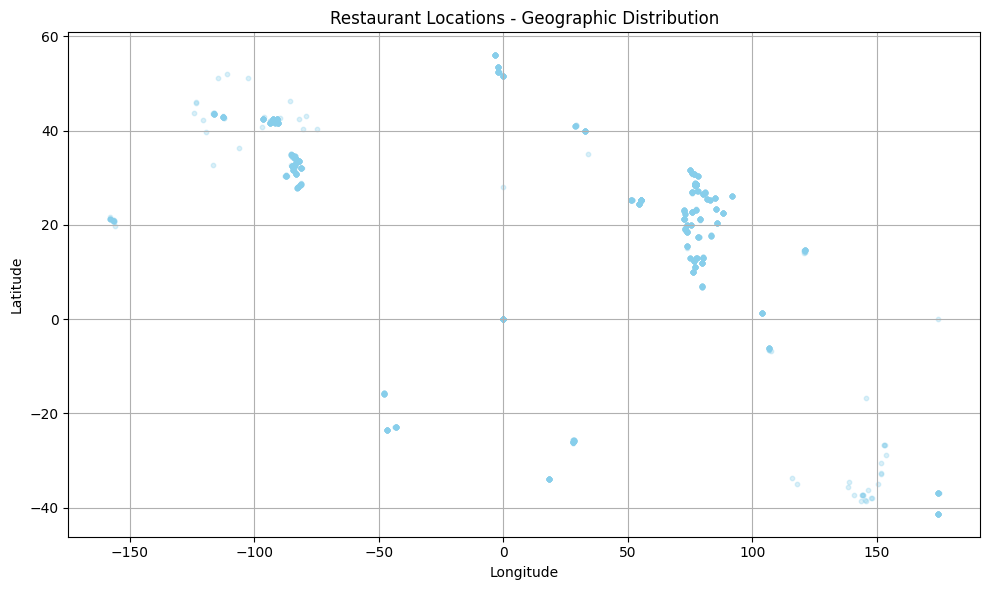

In [11]:
# Drop missing values in location columns
df = df.dropna(subset=['Longitude', 'Latitude'])

# Plot the restaurant locations
plt.figure(figsize=(10, 6))
plt.scatter(df['Longitude'], df['Latitude'], alpha=0.3, s=10, color='skyblue')
plt.title('Restaurant Locations - Geographic Distribution')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.tight_layout()
plt.show()

**TASK 4: Restaurant Chains**

In [12]:
# Count the number of times each restaurant name appears
chain_counts = df['Restaurant Name'].value_counts()

# Filter to get only chains (appearing more than once)
restaurant_chains = chain_counts[chain_counts > 1]
print("Restaurant Chains (Appeared more than once):")
print(restaurant_chains)

# Analyze average rating and average votes for each chain
chain_data = df[df['Restaurant Name'].isin(restaurant_chains.index)]
chain_analysis = chain_data.groupby('Restaurant Name')[['Aggregate rating', 'Votes']].mean().sort_values(by='Votes', ascending=False)

# Display top 10 chains by popularity
print("\nTop 10 Popular Restaurant Chains (by average votes):")
print(chain_analysis.head(10).round(2))


Restaurant Chains (Appeared more than once):
Restaurant Name
Cafe Coffee Day                     83
Domino's Pizza                      79
Subway                              63
Green Chick Chop                    51
McDonald's                          48
                                    ..
Koyla Kebab                          2
Country Curries                      2
Fluffles - The Fluffy Waffle Co.     2
Oberoi's                             2
The Flying Saucer Cafe               2
Name: count, Length: 734, dtype: int64

Top 10 Popular Restaurant Chains (by average votes):
                           Aggregate rating    Votes
Restaurant Name                                     
Truffles                               3.95  4841.00
Joey's Pizza                           4.25  3903.50
AB's - Absolute Barbecues              4.82  3350.00
Big Chill                              4.47  2713.25
Big Yellow Door                        4.27  2503.67
Out Of The Box                         3.85  2